# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: 
- `Glucose`: 
- `BloodPressure`: 
- `SkinThickness`: 
- `Insulin`: 
- `BMI`: 
- `DiabetesPedigreeFunction`: 
- `Age`: 
- `Outcome`: 

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load in data
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. How many columns (features) does the data contain?

In [42]:
# print number of columns
print('Number of columns: ', len(diabetes_data.columns))

Number of columns:  9


4. How many rows (observations) does the data contain?

In [43]:
# print number of rows
diabetes_data.shape

(768, 9)

## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [44]:
# find whether columns contain null values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [45]:
# perform summary statistics
diabetes_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**: 0 values ​​are probably null values

8. Do you spot any other outliers in the data?

**Your response to question 8**: 
- The maximum value of the Insulin column is 846, which is abnormally high.
- The maximum value of the Pregnancies column is 17. While having 17 pregnancies is not impossible, this case might be something to look further into to determine its accuracy.

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [46]:
# replace instances of 0 with NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [47]:
# find whether columns contain null values after replacements are made
print(pd.DataFrame({'Counts':diabetes_data.count(),'Counts Unique': diabetes_data.nunique(), 'Counts NA': diabetes_data.isnull().sum(), 'Percentages (%) NA': round(diabetes_data.isnull().sum()/diabetes_data.shape[0]*100,2)}))                                                                 

                          Counts  Counts Unique  Counts NA  Percentages (%) NA
Pregnancies                  768             17          0                0.00
Glucose                      763            135          5                0.65
BloodPressure                733             46         35                4.56
SkinThickness                541             50        227               29.56
Insulin                      394            185        374               48.70
BMI                          757            247         11                1.43
DiabetesPedigreeFunction     768            517          0                0.00
Age                          768             52          0                0.00
Outcome                      768              3          0                0.00


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [48]:
# print rows with missing values
diabetes_data[diabetes_data.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**: Most of the rows with missing data have missing values ​​in more than one column.

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [49]:
# print data types using .info() method
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [50]:
# print unique values of Outcome column
diabetes_data.Outcome.unique()

array(['1', '0', 'O'], dtype=object)

15. How might you resolve this issue? 

**Your response to question 15**: A possible next step would be to replace instances of 'O' with 0 and convert the Outcome column to type int64.

In [51]:
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace('O', 0).astype('int64')
diabetes_data.Outcome.unique()

array([1, 0], dtype=int64)

## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

In [52]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [53]:
diabetes_data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [54]:
diabetes_data['SkinThickness'].unique()

array([35., 29., nan, 23., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

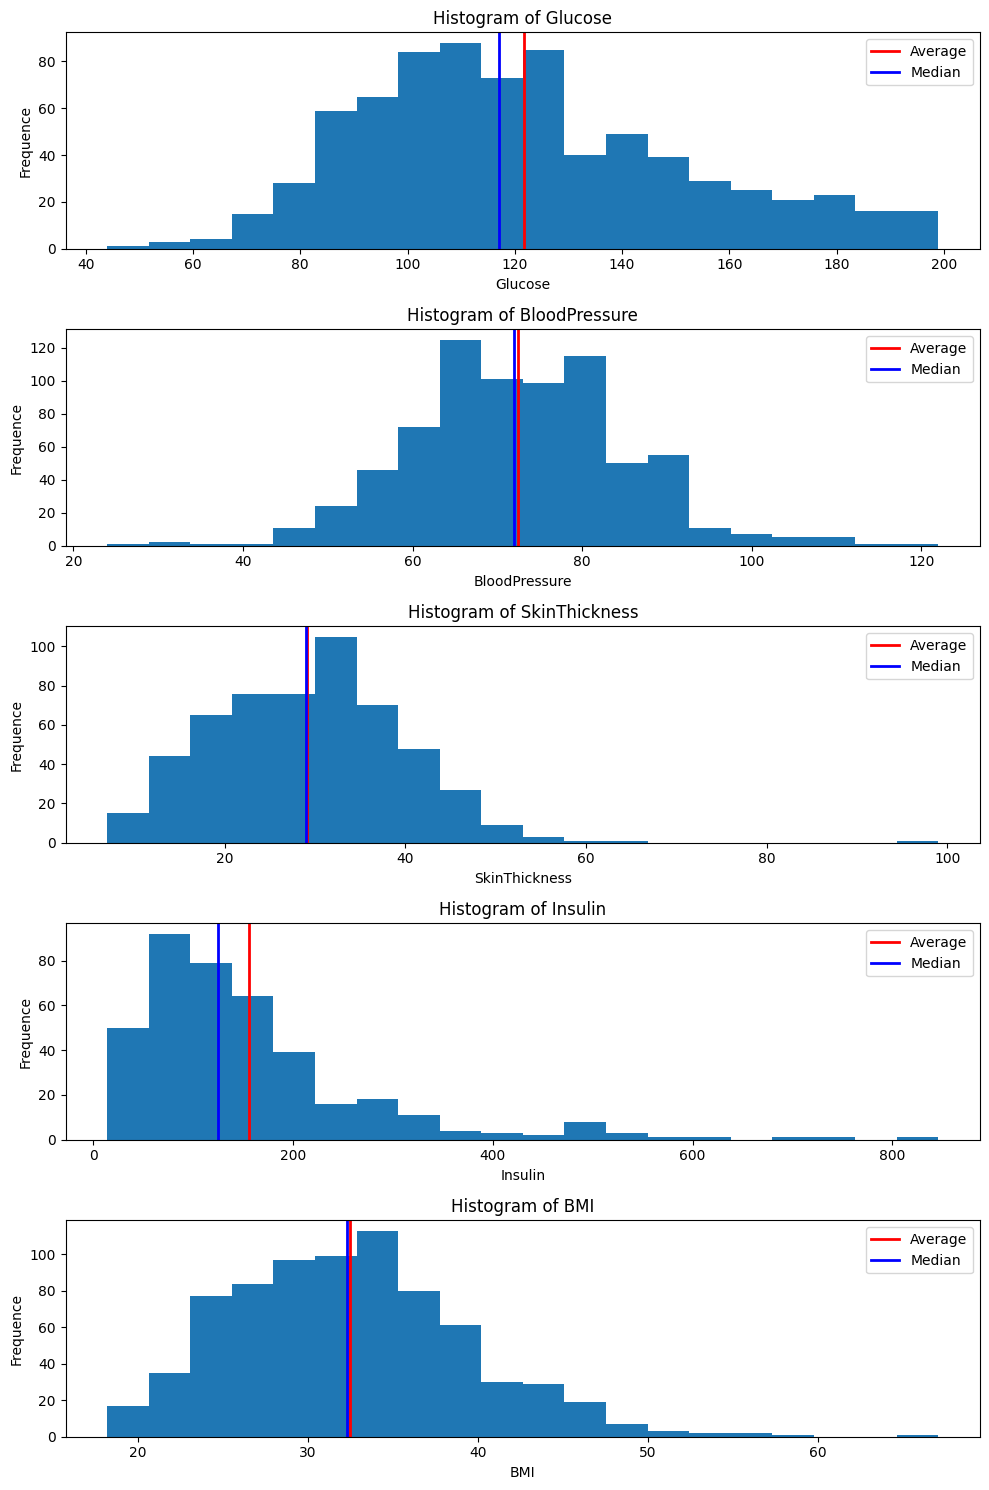

In [55]:
# List with variables with NA
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Creates a figure with subplots, one for each variable
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 15))  # Adjust the size of the figure as needed

# Iterate over the variables and create a histogram for each one
for i, variable in enumerate(variables):
    axs[i].hist(diabetes_data[variable], bins=20)  
    axs[i].set_title(f'Histogram of {variable}')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Frequence')

    # Calculate the mean and median
    mean = np.mean(diabetes_data[variable].dropna())
    median = np.median(diabetes_data[variable].dropna())

    # Add vertical lines for mean and median
    axs[i].axvline(mean, color='red', linestyle='solid', linewidth=2, label='Average')
    axs[i].axvline(median, color='blue', linestyle='solid', linewidth=2, label='Median')

   # Add the caption
    axs[i].legend()
# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [57]:
for variable in variables:
    if variable == 'Insulin':
        diabetes_data['Insulin'].fillna(np.median(diabetes_data['Insulin'].dropna()), inplace=True)
    else:
        diabetes_data[variable].fillna(np.mean(diabetes_data[variable].dropna()), inplace=True)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
